# Analysis of predictions for youth players

Using a database of over 2,000 players registered as English to establish patterns relating to the date of birth of male players who are eligible to represent England. This will factor in the level of football they are playing at, how many appearances they have made, and how many goals scored. Where possible, it will also look for patterns relating to where the player was born, to establish any sociological factor for success. 

In [1]:
import pandas as pd  
import matplotlib.pyplot as plt

#### English players by current tier

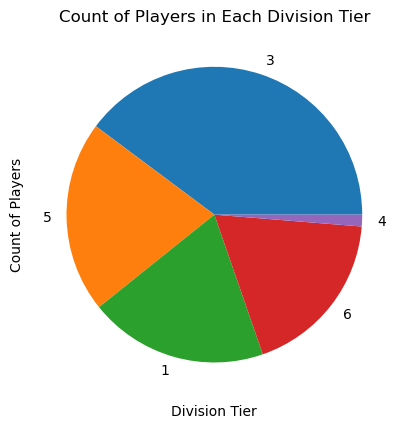

In [3]:
# Load the dataset
df = pd.read_csv('predictions_youth.csv')

# Count the occurrences of each unique Tier
tier_count = df['Predicted Tier Quality'].value_counts()

# Generate the pie chart
tier_count.plot(kind='pie')
plt.title('Count of Players in Each Division Tier')
plt.xlabel('Division Tier')
plt.ylabel('Count of Players')
plt.show()

In [ ]:
# # Load the dataset
# df = pd.read_csv('predictions_youth.csv')

# # Count the occurrences of each unique Tier
# tier_count = df['Division Tier'].value_counts()

# # Generate the pie chart
# plt.pie(tier_count, labels=tier_count.index, autopct='%1.1f%%')
# plt.title('Pie Chart of Players in Each Division Tier')
# plt.show()


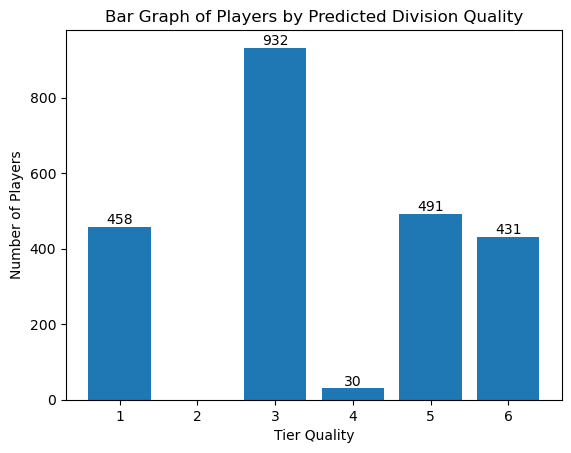

In [5]:
# Load the dataset
df = pd.read_csv('predictions_youth.csv')

# Count the occurrences of each unique Tier
tier_count = df['Predicted Tier Quality'].value_counts()

# Generate the bar graph
bars = plt.bar(tier_count.index, tier_count.values)

# Add the count above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, yval, ha='center', va='bottom')

plt.title('Bar Graph of Players by Predicted Division Quality')
plt.xlabel('Tier Quality')
plt.ylabel('Number of Players')
plt.show()


#### Looking at the birthdays

In [6]:
# Load the dataset
df = pd.read_csv('predictions_youth.csv')

# Convert 'Date of Birth' to datetime
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

# Extract month from 'Date of Birth'
df['Birth Month'] = df['Date of Birth'].dt.month

# Get a sorted list of months by most common
sorted_months = df['Birth Month'].value_counts().sort_values(ascending=False)

print(sorted_months)


Birth Month
9     313
10    304
12    241
11    234
1     230
3     178
2     168
4     157
5     154
6     132
7     120
8     111
Name: count, dtype: int64


/var/folders/fs/2pw0dc014ls93dt5yfjzx6w00000gn/T/ipykernel_13508/3802184228.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])


In [7]:
# Load the dataset
df = pd.read_csv('predictions_youth.csv')

# Convert 'Date of Birth' to datetime
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

# Extract month and year from 'Date of Birth'
df['Birth Month'] = df['Date of Birth'].dt.month
df['Birth Year'] = df['Date of Birth'].dt.year

# Group by 'Birth Year' and find the most common month for each year
# common_months_by_year = df.groupby('Birth Year')['Birth Month'].agg(lambda x: x.value_counts().idxmax())

# Group by 'Birth Year' and 'Birth Month' and get the count for each group
monthly_counts_by_year = df.groupby(['Birth Year', 'Birth Month']).size()

# print(common_months_by_year)

pd.set_option('display.max_rows', None)  # This will allow unlimited rows to be displayed.

print(monthly_counts_by_year)


Birth Year  Birth Month
1992        4               1
1993        9               1
1995        5               1
1997        11              1
1998        12              1
2000        7               1
            9               2
            12              1
2001        2               1
            5               1
            9               6
            10              8
            11              2
            12              2
2002        1               1
            2               4
            3               3
            4               2
            5               1
            6               1
            7               2
            8               1
            9              17
            10             29
            11             15
            12             18
2003        1              20
            2               9
            3               9
            4               8
            5              12
            6               7
            7   

/var/folders/fs/2pw0dc014ls93dt5yfjzx6w00000gn/T/ipykernel_13508/3540918016.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])


In [8]:
# Most common and least common birth months by year
def common_months(x):
    most_common = x.value_counts().idxmax()
    least_common = x.value_counts().idxmin()
    return most_common, least_common

# Group by 'Birth Year' and apply the custom function
common_least_common_months_by_year = df.groupby('Birth Year')['Birth Month'].agg(common_months)

print(common_least_common_months_by_year)


Birth Year
1992      (4, 4)
1993      (9, 9)
1995      (5, 5)
1997    (11, 11)
1998    (12, 12)
2000     (9, 12)
2001     (10, 5)
2002     (10, 8)
2003      (9, 7)
2004      (9, 6)
2005     (10, 8)
2006     (10, 4)
2007      (1, 9)
Name: Birth Month, dtype: object


In [10]:
# Group by 'Tier Quality' and find the most common birth month for each tier
common_month_by_tier = df.groupby('Predicted Tier Quality')['Birth Month'].agg(lambda x: x.value_counts().idxmax())

print(common_month_by_tier)


Predicted Tier Quality
1     9
3    10
4     5
5    10
6     9
Name: Birth Month, dtype: int32


In [11]:
# Most common quarter of birth by birth year 

def most_common_quarter(x):
    # Find the most common quarter
    most_common = x.value_counts().idxmax()
    return most_common

# Group by 'Birth Year' and apply the custom function
common_most_common_quarter_by_year = df.groupby('Birth Year')['Birth Quarter'].agg(most_common_quarter)

print(common_most_common_quarter_by_year)


Birth Year
1992    3
1993    1
1995    3
1997    1
1998    2
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    3
Name: Birth Quarter, dtype: int64


In [ ]:
# # Most common birth months by position

# def top_three_common_months(x):
#     return x.value_counts().nlargest(3).index.tolist()

# # Group by 'Position' and apply the custom function
# top_three_months_by_position = df.groupby('Position')['Birth Month'].agg(top_three_common_months)

# print(top_three_months_by_position)


Position
AM (C)                  [10, 9, 7]
AM (C), ST (C)           [9, 6, 4]
AM (L)                 [10, 2, 11]
AM (L), ST (C)           [4, 8, 1]
AM (LC)                 [8, 6, 10]
AM (R)                  [10, 9, 1]
AM (R), ST (C)        [11, 12, 10]
AM (RC)                  [3, 7, 4]
AM (RC), ST (C)                [6]
AM (RL)                 [1, 11, 3]
AM (RL), ST (C)         [9, 12, 2]
AM (RLC)                 [7, 4, 3]
D (C)                  [12, 9, 10]
D (C), DM              [9, 11, 12]
D (C), DM, M (C)        [1, 10, 8]
D (C), ST (C)                  [9]
D (C), WB (RL)                 [7]
D (L)                   [9, 2, 12]
D (L), DM                      [8]
D (LC)                 [11, 12, 1]
D (LC), M (L)                  [6]
D (LC), WB (L)         [5, 12, 10]
D (R)                  [10, 9, 11]
D (R), DM                      [6]
D (R), DM, M (C)           [9, 11]
D (R), M (C)               [9, 11]
D (R), WB (RL)                [12]
D (RC)                 [9, 11, 10]
D (RC), M (

In [12]:
# Define a custom aggregation function
def top_three_common_positions(x):
    return x.value_counts().nlargest(3).index.tolist()

# Group by 'Birth Month' and apply the custom function
top_three_positions_by_month = df.groupby('Birth Month')['Position'].agg(top_three_common_positions)

# Convert the result to a DataFrame for easier manipulation
top_three_positions_by_month_df = top_three_positions_by_month.reset_index()

# Define the desired order of months
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]

# Set 'Birth Month' as a categorical type with the specified order
top_three_positions_by_month_df['Birth Month'] = pd.Categorical(
    top_three_positions_by_month_df['Birth Month'], 
    categories=month_order, 
    ordered=True
)

# Sort the DataFrame by 'Birth Month'
top_three_positions_by_month_df = top_three_positions_by_month_df.sort_values('Birth Month')

# Print the sorted DataFrame
print(top_three_positions_by_month_df)

   Birth Month                    Position
8            9      [D (C), ST (C), M (C)]
9           10      [D (C), ST (C), M (C)]
10          11      [ST (C), D (C), M (C)]
11          12      [D (C), ST (C), M (C)]
0            1      [D (C), ST (C), M (C)]
1            2      [M (C), D (C), ST (C)]
2            3      [ST (C), D (C), M (C)]
3            4      [D (C), ST (C), M (C)]
4            5      [D (C), ST (C), M (C)]
5            6      [D (C), M (C), ST (C)]
6            7  [D (C), ST (C), DM, M (C)]
7            8      [ST (C), D (C), M (C)]


In [13]:
def top_three_common_months(x):
    return x.value_counts().nlargest(3).index.tolist()

# Group by 'Group' and apply the custom function
top_three_months_by_group = df.groupby('Group')['Birth Month'].agg(top_three_common_months)

# Convert the result to a DataFrame for easier manipulation
top_three_months_by_group_df = top_three_months_by_group.reset_index()

# Print the sorted DataFrame
print(top_three_months_by_group_df)


        Group  Birth Month
0    Defender  [9, 12, 10]
1     Forward   [10, 9, 1]
2  Midfielder  [9, 10, 11]


In [15]:
# Top 3 birth quarters by position group
def top_three_common_quarters(x):
    return x.value_counts().nlargest(3).index.tolist()

# Group by 'Group' and apply the custom function
top_three_quarters_by_group = df.groupby('Group')['Birth Quarter'].agg(top_three_common_quarters)

# Convert the result to a DataFrame for easier manipulation
top_three_quarters_by_group_df = top_three_quarters_by_group.reset_index()

# Print the result
print(top_three_quarters_by_group_df)


        Group Birth Quarter
0    Defender     [1, 2, 3]
1     Forward     [1, 2, 3]
2  Midfielder     [1, 2, 3]


In [19]:
# # Predicting height and weight

# from math import log10, floor

# # Group by 'Birth Month' and 'Group', then calculate the average weight and height
# average_stats_by_month_position = df.groupby(['Birth Month', 'Group']).agg(
#     avg_weight=('Weight (kg)', 'mean'),
#     avg_height=('Height (cm)', 'mean')
# ).reset_index()

# # Define the desired order of months
# month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]

# # Set 'Birth Month' as a categorical type with the specified order
# average_stats_by_month_position['Birth Month'] = pd.Categorical(
#     average_stats_by_month_position['Birth Month'], 
#     categories=month_order, 
#     ordered=True
# )

# # Sort the DataFrame by 'Birth Month' and 'Group'
# average_stats_by_month_position = average_stats_by_month_position.sort_values(['Birth Month', 'Group'])

# # Round the average weight and height to 1 significant figure
# # average_stats_by_month_position['avg_weight'] = average_stats_by_month_position['avg_weight'].apply(lambda x: round(x, 1 - int(floor(log10(abs(x))))))
# # average_stats_by_month_position['avg_height'] = average_stats_by_month_position['avg_height'].apply(lambda x: round(x, 1 - int(floor(log10(abs(x))))))

# # Print the sorted and formatted DataFrame
# print(average_stats_by_month_position)


KeyError: "Column(s) ['Height (cm)', 'Weight (kg)'] do not exist"

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Birth Month' is treated as a categorical variable with the specified order
month_order = [9, 10, 11, 12, 1, 2, 3, 4, 5, 6, 7, 8]
month_labels = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']

average_stats_by_month_position['Birth Month'] = pd.Categorical(
    average_stats_by_month_position['Birth Month'],
    categories=month_order,
    ordered=True
)

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

# Define a color palette
palette = sns.color_palette("husl", len(average_stats_by_month_position['Group'].unique()))

# Plot average weight vs. Birth Month
sns.scatterplot(
    ax=axes[0],
    data=average_stats_by_month_position,
    x='Birth Month',
    y='avg_weight',
    hue='Group',
    palette=palette,
    s=100,  # size of points
    legend='full'
)
axes[0].set_title('Average Weight by Birth Month and Group')
axes[0].set_ylabel('Average Weight (kg)')
axes[0].set_xlabel('Birth Month')
axes[0].set_xticklabels(month_labels)

# Plot average height vs. Birth Month
sns.scatterplot(
    ax=axes[1],
    data=average_stats_by_month_position,
    x='Birth Month',
    y='avg_height',
    hue='Group',
    palette=palette,
    s=100,  # size of points
    legend='full'
)
axes[1].set_title('Average Height by Birth Month and Group')
axes[1].set_ylabel('Average Height (cm)')
axes[1].set_xlabel('Birth Month')
axes[1].set_xticklabels(month_labels)

# Adjust the layout
plt.tight_layout()
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Show the plots
plt.show()


NameError: name 'average_stats_by_month_position' is not defined

ValueError: items in new_categories are not the same as in old categories

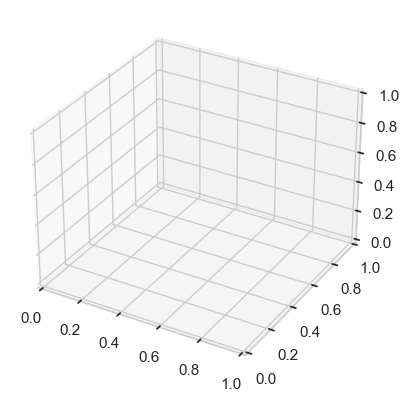

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import calendar

# Create a new figure and add a 3D subplot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Get unique groups for different colors in the plot
groups = average_stats_by_month_position['Group'].unique()
colors = plt.cm.jet(np.linspace(0, 1, len(groups)))

# Scatter plot for each group
for color, group in zip(colors, groups):
    # Filter data for each group
    group_data = average_stats_by_month_position[average_stats_by_month_position['Group'] == group]
    
    months_order = ['Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
    group_data['Birth Month'] = group_data['Birth Month'].cat.reorder_categories(months_order, ordered=True)
    
    # Convert 'Birth Month' to numerical values for plotting
    numerical_months = group_data['Birth Month'].cat.codes
    
    # Map numerical months to month abbreviations
    month_names = [calendar.month_abbr[i+1] for i in range(len(numerical_months))]
    
    # Create a scatter plot
    ax.scatter(numerical_months, group_data['avg_weight'], group_data['avg_height'], label=group, color=color)
    
    # Set x-tick labels to month abbreviations
    ax.set_xticks(range(len(month_names)))
    ax.set_xticklabels(months_order)
    
    # Set the x-axis to start at index of 'Sep'
    ax.set_xlim(left=months_order.index('Sep'))

# Labeling
ax.set_xlabel('Birth Month')
ax.set_ylabel('Average Weight (kg)')
ax.set_zlabel('Average Height (cm)')
ax.set_title('3D Scatter Plot of Average Stats by Birth Month and Group')

# Place the legend to the side
ax.legend(loc='upper left', bbox_to_anchor=(1.2, 1))

# Show the plot
plt.show()

In [ ]:
import pandas as pd

# Convert 'Date of Birth' to datetime
df['Date of Birth'] = pd.to_datetime(df['Date of Birth'])

# Extract month from 'Date of Birth'
df['Month of Birth'] = df['Date of Birth'].dt.month

# Define custom month order
month_order = [9, 10, 11, 1, 2, 3, 4, 5, 6, 7, 8]

# Apply custom month order
df['Month of Birth'] = pd.Categorical(df['Month of Birth'], categories=month_order, ordered=True)

# Group by '2nd Nationality' and 'Month of Birth', then calculate the average 'Tier Quality'
average_tier_quality = df.groupby(['2nd Nationality', 'Month of Birth'])['Tier Quality']\
    .mean().reset_index()

# Round the average 'Tier Quality' to one significant figure
average_tier_quality['Tier Quality'] = average_tier_quality['Tier Quality'].round(1)

# Sort by '2nd Nationality' and custom 'Month of Birth' order
average_tier_quality_sorted = average_tier_quality.sort_values(by=['2nd Nationality', 'Month of Birth'])

print(average_tier_quality_sorted)


    2nd Nationality Month of Birth  Tier Quality
0               ALB              9           NaN
1               ALB             10           NaN
2               ALB             11           NaN
3               ALB              1           NaN
4               ALB              2           NaN
5               ALB              3           NaN
6               ALB              4           6.0
7               ALB              5           NaN
8               ALB              6           6.0
9               ALB              7           NaN
10              ALB              8           NaN
11              ALG              9           NaN
12              ALG             10           NaN
13              ALG             11           NaN
14              ALG              1           NaN
15              ALG              2           NaN
16              ALG              3           NaN
17              ALG              4           7.0
18              ALG              5           NaN
19              ALG 

/var/folders/fs/2pw0dc014ls93dt5yfjzx6w00000gn/T/ipykernel_65358/3303746057.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_tier_quality = df.groupby(['2nd Nationality', 'Month of Birth'])['Tier Quality']\


In [ ]:
# Drop rows with NaN 'Tier Quality' values
average_tier_quality_sorted = average_tier_quality_sorted.dropna(subset=['Tier Quality'])

# Find the index of the highest and lowest 'Tier Quality' for each '2nd Nationality'
idx_max = average_tier_quality_sorted.groupby('2nd Nationality')['Tier Quality'].idxmax()
idx_min = average_tier_quality_sorted.groupby('2nd Nationality')['Tier Quality'].idxmin()

# Retrieve the rows corresponding to the highest and lowest 'Tier Quality'
highest_tier_months = average_tier_quality_sorted.loc[idx_max].reset_index(drop=True)
lowest_tier_months = average_tier_quality_sorted.loc[idx_min].reset_index(drop=True)

# Print the results
print("Highest Tier Ranked Months:\n", highest_tier_months)
print("\nLowest Tier Ranked Months:\n", lowest_tier_months)


Highest Tier Ranked Months:
    2nd Nationality Month of Birth  Tier Quality
0              ALB              4           6.0
1              ALG              4           7.0
2              ANG              9           7.0
3              ATG              4           4.5
4              AUS             11           6.0
5              BAN             10           3.0
6              BDI              9           5.0
7              BEL              9           6.0
8              BER             11           6.0
9              BRB              6           5.0
10             CAN              9           6.0
11             CIV             10           3.7
12             CMR              3           3.5
13             COD              8           7.0
14             COL              7           6.0
15             CPV             10           6.0
16             CRO             11           6.0
17             CYP              2           5.0
18             CZE              7           6.0
19         

In [ ]:
# Define a custom aggregation function to return the first mode or NaN if empty
def get_first_mode(series):
    modes = series.mode()
    if len(modes) > 0:
        return modes[0]
    else:
        return pd.NA

# Find the most common 'Month of Birth' for each '2nd Nationality', returning only the first mode or NaN
most_common_month = df.groupby('2nd Nationality')['Month of Birth'].agg(get_first_mode).reset_index()

# Merge the two DataFrames on '2nd Nationality'
result_table = pd.merge(average_tier_quality, most_common_month, on='2nd Nationality')

# Rename columns for clarity
result_table.columns = ['2nd Nationality', 'Average Tier Quality', 'Most Common Birth Month']

# Print the result table
print(result_table)


   2nd Nationality  Average Tier Quality Most Common Birth Month
0              ALB              6.000000                       4
1              ALG              7.000000                       4
2              ANG              4.000000                       9
3              ATG              4.500000                       4
4              AUS              6.000000                      11
5              BAN              3.000000                      10
6              BDI              5.000000                       9
7              BEL              5.500000                       9
8              BER              6.000000                      11
9              BRB              3.142857                       9
10             CAN              3.833333                       9
11             CIV              3.818182                      10
12             CMR              3.600000                       3
13             COD              3.869565                      10
14             COL       